1) Load datasetet digits fra sklearn load_digits
    a) Plot a digit [0] as an image.
plt.gray()
plt.matshow(digits.images[0])

2) Do dimensionality reduction with NCA neighbourhood components analysis and standard scalar.
    a) Hint, use the following link
https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html#sphx-glr-auto-examples-neighbors-plot-nca-dim-reduction-py
    b) Make the model
    c) Train the model
    d) Check accuracy of the data dimensionality reduction, using KNN
    e) Show the scatterplot

3) Use MeanShift with Bandwith=80 and fit it with the reduced dimensionality data from exercise 2.
    a) Use numpy to print all the unique cluster labels_
    a.1) Note that we have the same amount of labels, as we did clusters in different collors from the previous task
    b) Scatter plot meanshift output, including the cluster centers

(1797, 64)


<Figure size 432x288 with 0 Axes>

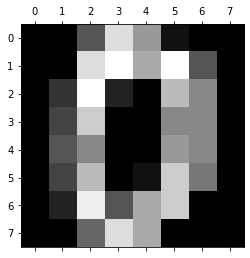

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
digits = load_digits()
print(digits.data.shape)
plt.gray() 
plt.matshow(digits.images[0]) 

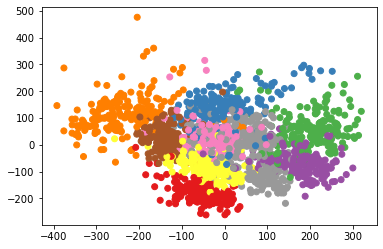

In [5]:
import sklearn as skl
import sklearn.pipeline as sklpip

data, target = load_digits(return_X_y=True)
model = sklpip.make_pipeline(skl.preprocessing.StandardScaler(), skl.neighbors.NeighborhoodComponentsAnalysis(n_components=2, random_state=0))

model.fit(data, target)
data_embedded = model.transform(data)

X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(
    data, target, random_state=1)

neighb = skl.neighbors.KNeighborsClassifier(n_neighbors=5)
neighb.fit(model.transform(X_train), y_train)
score_neighb = neighb.score(model.transform(X_test), y_test)

plt.scatter(data_embedded[:,0], data_embedded[:, 1], c=target, cmap='Set1')

[0 1 2 3 4 5 6 7 8]


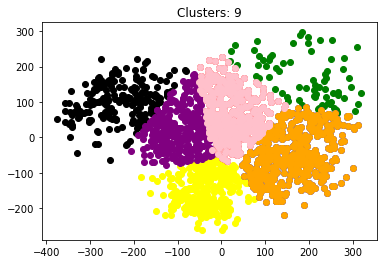

In [12]:
from sklearn.cluster import MeanShift
import numpy as np

result = MeanShift(bandwidth=80)
result.fit(data_embedded)

groups = result.labels_
print(np.unique(groups))

colour = ["yellow","red", "green", "blue", "black", "orange", "purple", "pink"]
for val, colour in zip(groups, colour):
    pic = groups == val
    center = result.cluster_centers_[val]
    plt.scatter(data_embedded[pic, 0], data_embedded[pic, 1], c=colour)
    plt.plot(center[0], center[1], 'k', markerfacecolor=colour,
             markeredgecolor='k', markersize=14)
plt.title('Clusters: %d' % len(result.cluster_centers_))
plt.show()